##  Introduction

As a car hire company, understanding the factors influencing fuel efficiency, maintenance costs, and customer preferences is critical to selecting the right mix of vehicles. This project aims to analyze car makes and models using SQL for data extraction and linear regression to identify trends in fuel consumption, engine performance, and other key metrics. By leveraging historical data on vehicle specifications and performance, we can predict which car models align best with our business needs, ensuring a balance between operational costs and customer satisfaction.

### Problem Statement

In the car hire industry, selecting the right vehicles for a fleet is crucial to balancing customer satisfaction and operational efficiency. Car hire companies must choose vehicles that not only meet customer expectations in terms of reliability and comfort but also minimize costs related to fuel, maintenance, and depreciation. With numerous car makes and models available, each with unique specifications and performance metrics, making data-driven decisions becomes essential to avoid costly mistakes in fleet investments.

As a data scfientist i have been tasked to analyze historical data on various car makes and models to determine which vehicles are optimal for the car hire company’s fleet. By examining factors such as fuel consumption, engine performance, and other relevant characteristics, we aim to create a model that predicts the best car choices for maximizing profitability and customer satisfaction. Using SQL for data manipulation and linear regression for predictive analysis, we will identify the vehicle types that offer a cost-effective solution while meeting operational and customer needs.

### Objectives

Data Extraction and Cleaning: 
Use SQL to extract and clean the dataset, ensuring it is suitable for analysis by removing any inconsistencies, handling missing values, and organizing data to facilitate a smooth analysis.

Exploratory Data Analysis (EDA): 
Analyze the dataset to understand key variables, distributions, and trends, with a focus on factors like fuel consumption, engine size, and vehicle class. We will also seek to identify relationships and outliers that may impact our final model.

Feature Selection: 
Identify the most relevant features that influence vehicle performance and suitability for a car hire fleet. This will include examining fuel efficiency, vehicle type, engine size, and other characteristics relevant to operational and customer satisfaction goals.

Develop a Predictive Model: 
Use linear regression to build a model that predicts vehicle performance and cost-effectiveness based on historical data. This model will help forecast the impact of different vehicle types on operational costs and customer preferences.

Determine Optimal Car Makes and Models: 
Based on the insights from the model, recommend the car makes and models that align with our business goals—cost efficiency, fuel economy, and customer satisfaction.

Provide Business Recommendations: 
Develop actionable insights and recommendations on the types of vehicles to prioritize in future fleet purchases to maximize profitability, operational efficiency, and customer appeal.

### Data Loading

In [1]:
#Import necessary liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the Vehicles data Fuel_Consumption_2000_2022.csv as vehicles_df
# index column event.id will to be used as the first column
# in order to handle the large data set more efficiently the low memory has been set to False
#url of data file; url
url = 'https://raw.githubusercontent.com/WambuiMunene/Phase2-Project_Group-4/refs/heads/main/Data/Fuel_Consumption_2000_2022.csv'
vehicles_df = pd.read_csv(url, index_col=0, low_memory=False, encoding='ISO-8859-1')


In [3]:
#Checking the structure of the data
print('The shape of the DataFrame:' , vehicles_df.shape)
num_rows, num_columns= vehicles_df.shape
print('The number of rows:', num_rows)
print('The number of columns:', num_columns)

The shape of the DataFrame: (22556, 12)
The number of rows: 22556
The number of columns: 12


In [4]:
# Previewing the top of the dataset
vehicles_df.head()

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
YEAR,,,,,,,,,,,,
2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [5]:
#Examine the structure of the data to check if:
    # the data types are correct based on what the expected data in the fields need to display
    # the non-null count column helps to identify columns that have missing values
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22556 entries, 2000 to 2022
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MAKE              22556 non-null  object 
 1   MODEL             22556 non-null  object 
 2   VEHICLE CLASS     22556 non-null  object 
 3   ENGINE SIZE       22556 non-null  float64
 4   CYLINDERS         22556 non-null  int64  
 5   TRANSMISSION      22556 non-null  object 
 6   FUEL              22556 non-null  object 
 7   FUEL CONSUMPTION  22556 non-null  float64
 8   HWY (L/100 km)    22556 non-null  float64
 9   COMB (L/100 km)   22556 non-null  float64
 10  COMB (mpg)        22556 non-null  int64  
 11  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 2.2+ MB


The Data types are in line with what we expect. No columns have missing values


#### Univariate Analysis for numerical columns

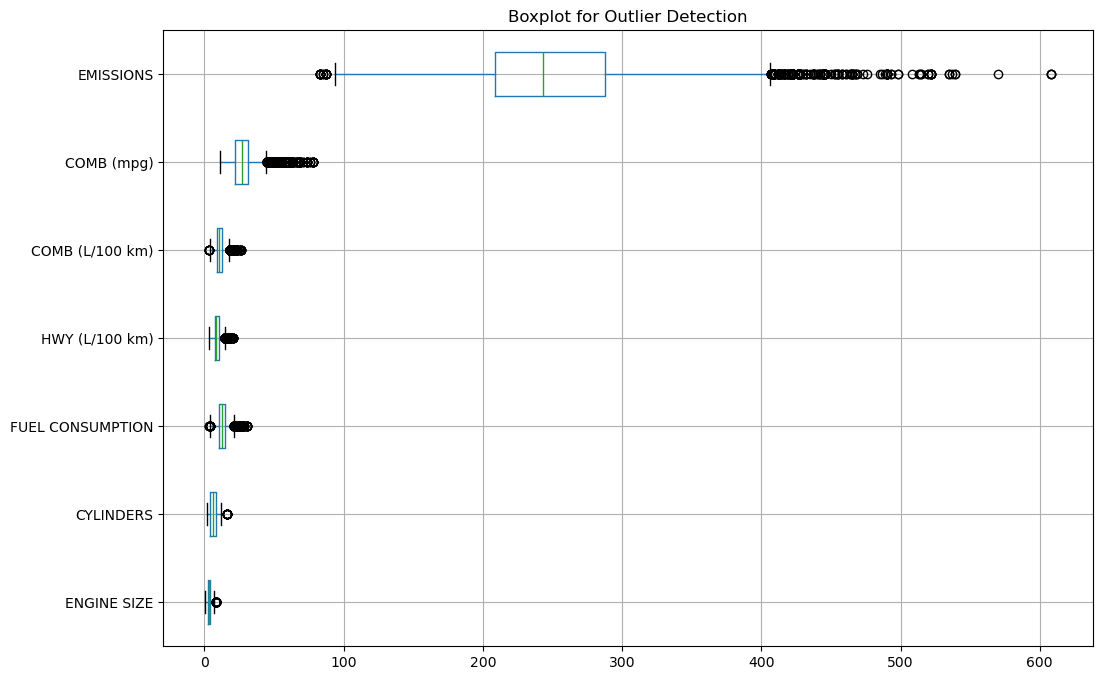

In [6]:
# Checking for outliers in the numerical columns
# Box plots will be used to visualize outliers
# Plot a boxplot for each numerical column
vehicles_df.boxplot(figsize=(12, 8), vert=False)
plt.title("Boxplot for Outlier Detection")
plt.show()

### Interpretation of box plots

ENGINE SIZE:
The distribution of engine sizes has some low and high outliers.
Most data points are clustered close to the lower end, indicating that a majority of vehicles have smaller engine sizes, with only a few having larger engines.

CYLINDERS:
The boxplot shows several outliers on both ends, but they are not as extreme as in some other variables.
The majority of vehicles likely have a mid-range number of cylinders, with fewer vehicles at the lower and higher ends, possibly representing compact and high-performance vehicles.

FUEL CONSUMPTION:
There are a few outliers on both ends, but the distribution is relatively compact.
This suggests that fuel consumption values for most vehicles are fairly consistent, with a few outliers representing very high or very low consumption.

HWY (L/100 km):
The highway fuel consumption values have numerous outliers on the high end, indicating that some vehicles are significantly less fuel-efficient on the highway.
The main cluster of data suggests that most vehicles have a moderate fuel consumption level on highways, with some extreme values potentially representing heavy vehicles or older models.

COMB (L/100 km):
Combined fuel consumption also has many outliers on the high end, similar to highway consumption, indicating that certain vehicles consume significantly more fuel overall.
The main distribution is lower and fairly consistent, suggesting that most vehicles have similar combined fuel consumption rates, with some high-consumption outliers.

COMB (mpg):
This variable is in miles per gallon, so the higher outliers indicate vehicles that are exceptionally fuel-efficient.
Most of the data is concentrated at a moderate mpg level, with a few high mpg outliers potentially representing hybrid or electric vehicles.

EMISSIONS:
Emissions have a large number of high outliers, indicating that some vehicles produce significantly more emissions than others.
The main cluster shows that most vehicles have moderate emissions, with the high outliers possibly representing older or less environmentally friendly models.

Outliers: 

There are substantial outliers, especially in EMISSIONS, HWY (L/100 km), COMB (L/100 km), and COMB (mpg). These outliers represent vehicles with either very high or low values for emissions, fuel efficiency, and fuel consumption.

Skewed Distributions: 

For variables like EMISSIONS and COMB (mpg), the distributions are skewed, indicating that the dataset contains vehicles with extreme performance characteristics (either very eco-friendly or not at all).
This boxplot analysis suggests that the dataset contains a diverse range of vehicle types, from highly fuel-efficient, low-emission cars to less efficient, high-emission models. For the car hire company, I recommend a focus on vehicles within the main distribution ranges (non-outliers) for a more consistent and reliable fleet, while carefully considering any outliers that align with specific customer needs (e.g., eco-friendly vehicles or high-performance models).

In [7]:
# Checking for outliers using Z-scores
# Calculate z-scores for numerical columns

from scipy.stats import zscore

z_scores = vehicles_df.select_dtypes(include='number').apply(zscore)

# Flag rows with a z-score > 3 or < -3 as outliers
outliers = (z_scores.abs() > 3)
outliers_count = outliers.sum()
print("Outliers count per column using Z-scores:")
print(outliers_count)

Outliers count per column using Z-scores:
ENGINE SIZE          41
CYLINDERS           463
FUEL CONSUMPTION    177
HWY (L/100 km)      292
COMB (L/100 km)     219
COMB (mpg)          275
EMISSIONS           105
dtype: int64


### Interpretation of Z-score

ENGINE SIZE (41 outliers): This suggests that there are 41 vehicles in the dataset with engine sizes significantly larger or smaller than the typical range. Such vehicles may represent very high-performance or low-capacity engines.

CYLINDERS (463 outliers): A high number of outliers in the "Cylinders" column could indicate a broad range of vehicle types, from smaller, more fuel-efficient engines with fewer cylinders to high-performance engines with many cylinders. This variability reflects different categories of vehicles (e.g., compact cars versus trucks or sports cars).

FUEL CONSUMPTION (177 outliers): The number of outliers in "Fuel Consumption" suggests that 177 vehicles have either exceptionally high or low fuel consumption compared to the average vehicle. High outliers could represent larger vehicles or less fuel-efficient models, while low outliers could indicate more fuel-efficient vehicles, such as hybrids or electric cars.

HWY (L/100 km) (292 outliers): This high count of outliers in highway fuel consumption indicates significant differences in fuel efficiency on highways. Certain cars may be optimized for highway driving, while others might be less efficient.

COMB (L/100 km) (219 outliers): Combined fuel consumption outliers suggest that 219 vehicles fall outside the typical range for overall fuel efficiency, reinforcing that there is a wide variation in how fuel-efficient different models are across various driving conditions.

COMB (mpg) (275 outliers): This count reflects outliers in miles per gallon (mpg), an alternative fuel efficiency metric. The outliers here are likely vehicles that are either much more or much less efficient than average.

EMISSIONS (105 outliers): Outliers in emissions indicate that certain vehicles produce significantly more or less emissions than others. Higher outliers might represent older or less environmentally friendly cars, while lower outliers could be newer, more eco-friendly models

These outliers show considerable variability in your dataset across engine size, fuel consumption, and emissions. This diversity suggests that your fleet options range widely in efficiency and environmental impact. For a car hire company, understanding these extremes could be useful to cater to different customer needs (e.g., offering both eco-friendly and high-performance options) and to balance operational costs through informed fleet selection

#### Univariate Analysis for the Categorical Columns

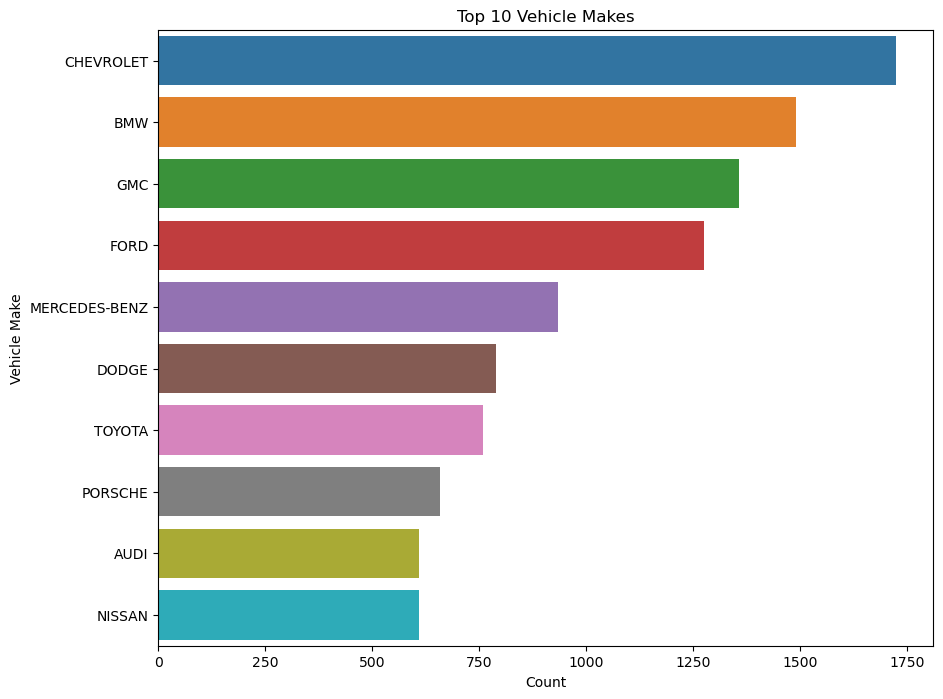

In [8]:
# Top Car Makes
top_n = 10

top_makes = vehicles_df['MAKE'].value_counts().head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_makes.index, x=top_makes.values)
plt.title(f'Top {top_n} Vehicle Makes')
plt.xlabel('Count')
plt.ylabel('Vehicle Make')
plt.show()

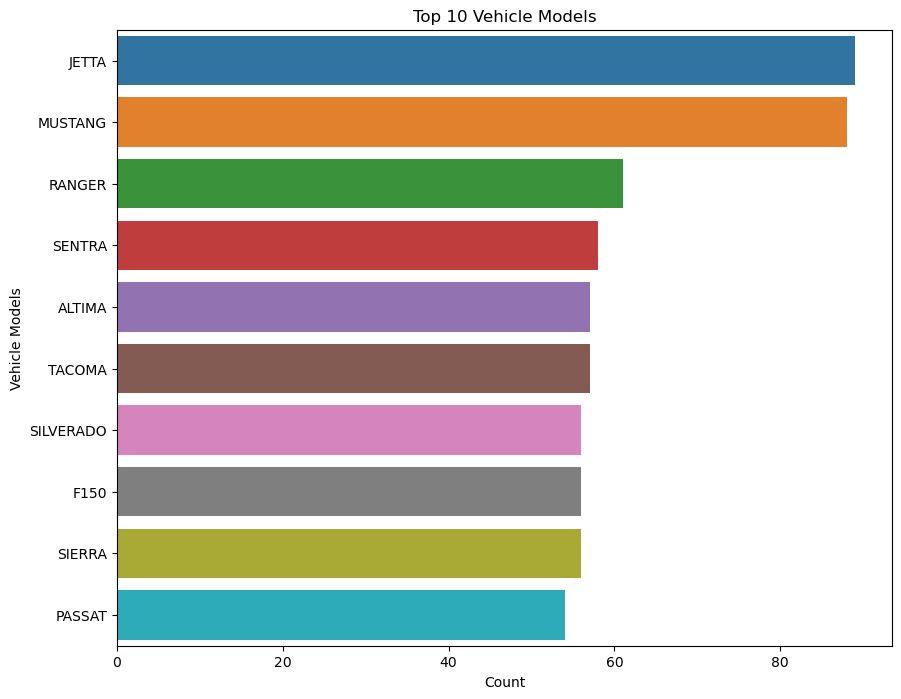

In [9]:
# Top Car Models
top_n = 10

top_models = vehicles_df['MODEL'].value_counts().head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_models.index, x=top_models.values)
plt.title(f'Top {top_n} Vehicle Models')
plt.xlabel('Count')
plt.ylabel('Vehicle Models')
plt.show()

## Bivariate analysis

I will analyze two variables simultaneously to understand the relationship between them

#### 1. ENGINE SIZE vs. FUEL CONSUMPTION (L/100 km)
Objective is to understand if there's a relationship between engine size and fuel consumption. Typically, you might expect larger engines to consume more fuel

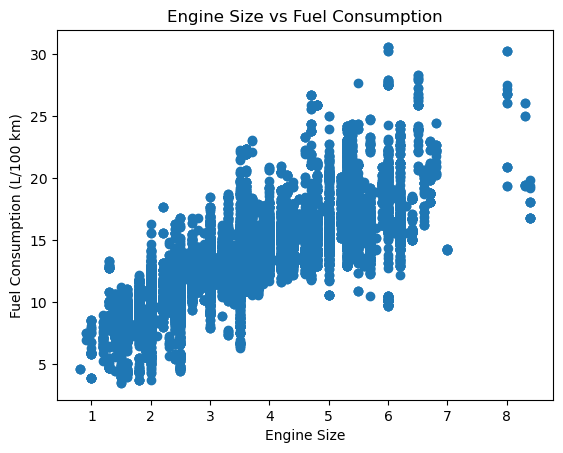

In [10]:
plt.scatter(vehicles_df['ENGINE SIZE'], vehicles_df['FUEL CONSUMPTION'])
plt.xlabel('Engine Size')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.title('Engine Size vs Fuel Consumption')
plt.show()

###### Correlation Coefficient

In [11]:
correlation = vehicles_df['ENGINE SIZE'].corr(vehicles_df['FUEL CONSUMPTION'])
print(f"Correlation between ENGINE SIZE and FUEL CONSUMPTION: {correlation}")

Correlation between ENGINE SIZE and FUEL CONSUMPTION: 0.8216050176245043


This means there is a positve correlation between the engine size and fuel consumption

#### EMISSIONS vs. FUEL CONSUMPTION (L/100 km)
Objective is to understand if there's a relationship between fuel consumption and emmissions. Typically, you might expect high fuel consumtion to imply high emmissions

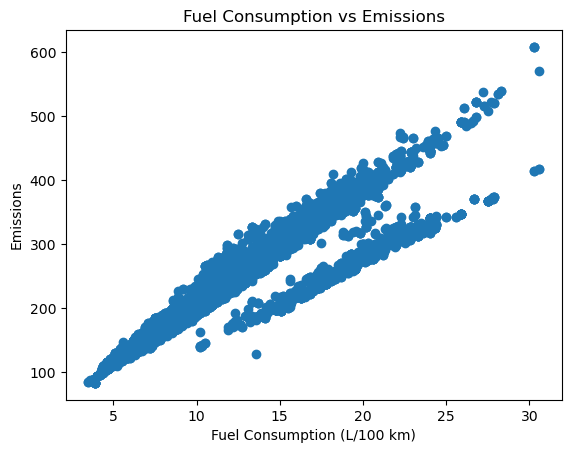

In [12]:
plt.scatter(vehicles_df['FUEL CONSUMPTION'], vehicles_df['EMISSIONS'])
plt.xlabel('Fuel Consumption (L/100 km)')
plt.ylabel('Emissions')
plt.title('Fuel Consumption vs Emissions')
plt.show()

This means there is a positve correlation between the fuel consumption and emissions

#### EMISSIONS vs.MAKE AND MODEL
Objective is To determine which model has the highest emissions

In [13]:
# Find the row with the highest emissions
highest_emission_row = vehicles_df[vehicles_df['EMISSIONS'] == vehicles_df['EMISSIONS'].max()]

# Display the make, model, and emissions value
print(highest_emission_row[['MAKE', 'MODEL', 'EMISSIONS']])

         MAKE               MODEL  EMISSIONS
YEAR                                        
2021  Bugatti    Chiron Pur Sport        608
2022  Bugatti    Chiron Pur Sport        608
2022  Bugatti  Chiron Super Sport        608


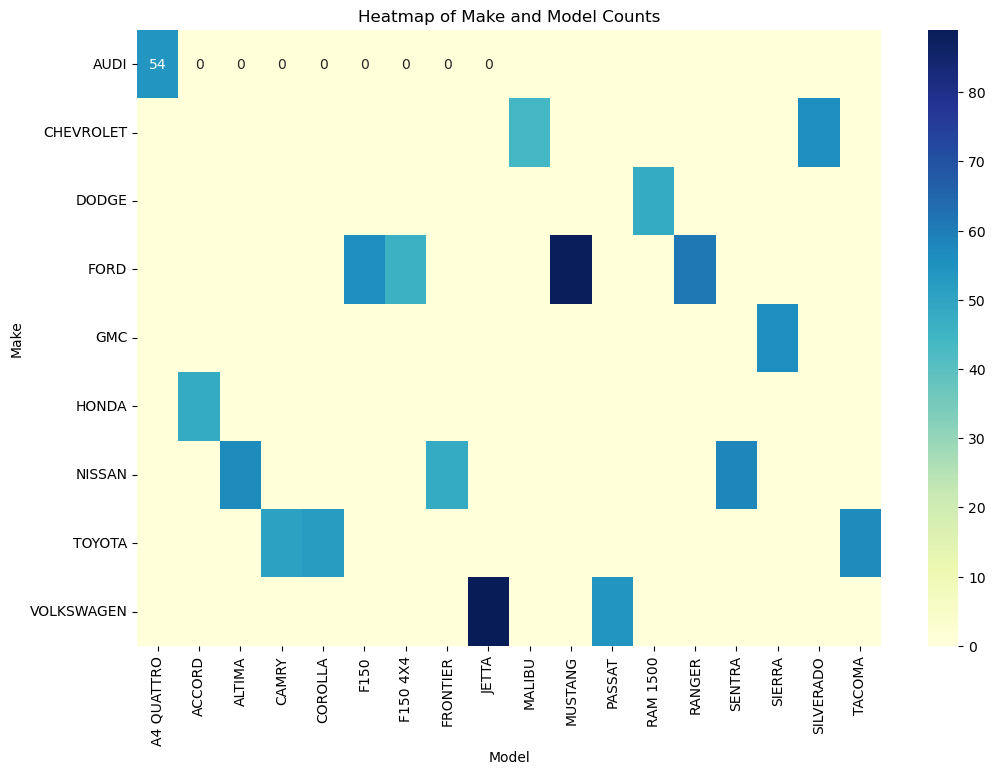

In [14]:
#Make and Model Analysis 
# Select top 20 makes and models for a manageable heatmap size
top_makes = vehicles_df['MAKE'].value_counts().head(20).index
top_models = vehicles_df['MODEL'].value_counts().head(20).index

# Filter data for top makes and models
filtered_df = vehicles_df[(vehicles_df['MAKE'].isin(top_makes)) & (vehicles_df['MODEL'].isin(top_models))]

# Create a pivot table for the heatmap
make_model_counts = filtered_df.pivot_table(index='MAKE', columns='MODEL', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(make_model_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Model')
plt.ylabel('Make')
plt.title('Heatmap of Make and Model Counts')
plt.show()

This heatmap shows which models are more common for each make, helping to identify popular choices that might be preferred by customers or more readily available in the market.
Popular Models: The Audi A4 QUATTRO, Volkswagen Jetta, Toyota Camry, and Toyota Corolla are among the most frequently occurring models in this subset, suggesting they may be popular choices

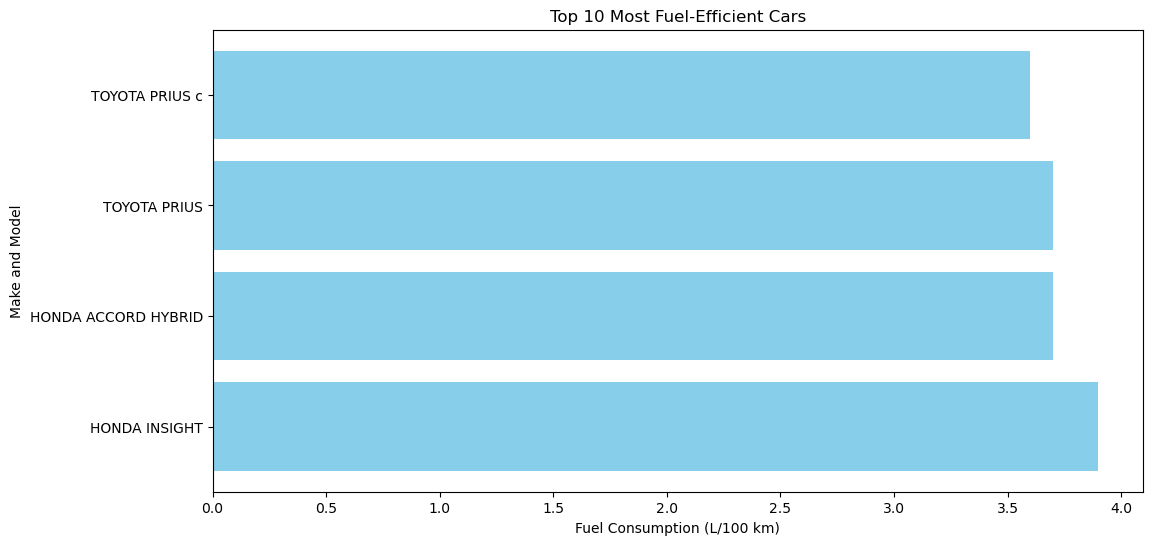

In [17]:
# Top 10 Most Fuel-Efficient Models

# Sort by fuel consumption and select the top 10 most fuel-efficient cars
top_fuel_efficient = vehicles_df[['MAKE', 'MODEL', 'FUEL CONSUMPTION']].sort_values(by='FUEL CONSUMPTION').head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_fuel_efficient['MAKE'] + " " + top_fuel_efficient['MODEL'], top_fuel_efficient['FUEL CONSUMPTION'], color='skyblue')
plt.xlabel('Fuel Consumption (L/100 km)')
plt.ylabel('Make and Model')
plt.title('Top 10 Most Fuel-Efficient Cars')
plt.gca().invert_yaxis()  # Invert y-axis to show the most fuel-efficient at the top
plt.show()